In [3]:
import dill
dill.load_session('notebook_env.db')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [5]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[6], polygon_example_1[3]),
                      (polygon_example_1[2], polygon_example_1[4]),]
       

In [6]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()


In [7]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()


In [8]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()


## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

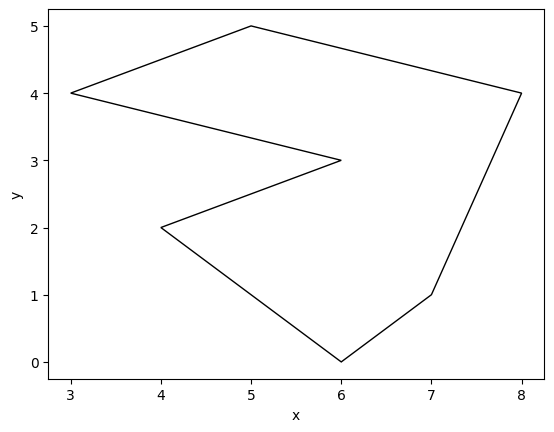

In [9]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

In [10]:
%matplotlib tk
from matplotlib.backend_bases import MouseButton
from copy import deepcopy
# TO SAVE YOUR POLYGON SIMPLY EXIT THE PLOT WINDOW
print("TO SAVE YOUR POLYGON SIMPLY EXIT THE PLOT WINDOW")
polygon=[]
x=[]
y=[]
fig, ax = plt.subplots()
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.scatter(x,y)

def on_click(event):
    global x,y
    if event.button is MouseButton.LEFT and event.inaxes:
        new_vertex=(event.xdata,event.ydata)
        x.append(new_vertex[0])
        y.append(new_vertex[1])
        polygon.append(new_vertex)
        print(f"Added {new_vertex}")
        
        ax.clear()
        ax.set_xlim(0,100)
        ax.set_ylim(0,100)
        p_x,p_y=deepcopy(x),deepcopy(y)
        p_x.append(x[0])
        p_y.append(y[0])
        ax.scatter(p_x,p_y)
        ax.plot(p_x,p_y)
        plt.show()



plt.connect("button_press_event", on_click)

plt.show()

TO SAVE YOUR POLYGON SIMPLY EXIT THE PLOT WINDOW


Added (35.88709677419355, 94.48051948051949)
Added (15.524193548387096, 73.10606060606062)
Added (31.653225806451612, 55.24891774891776)
Added (13.306451612903224, 33.87445887445888)
Added (36.49193548387096, 39.82683982683983)
Added (20.161290322580644, 11.14718614718615)
Added (54.63709677419355, 0.5952380952380949)
Added (57.86290322580645, 25.487012987012992)
Added (77.41935483870968, 3.3008658008658003)
Added (93.14516129032258, 25.75757575757576)
Added (65.52419354838709, 47.94372294372296)
Added (91.53225806451613, 72.02380952380953)
Added (63.508064516129025, 64.9891774891775)
Added (83.46774193548387, 86.63419913419915)
Added (56.653225806451616, 77.43506493506494)
Added (53.62903225806451, 96.91558441558443)


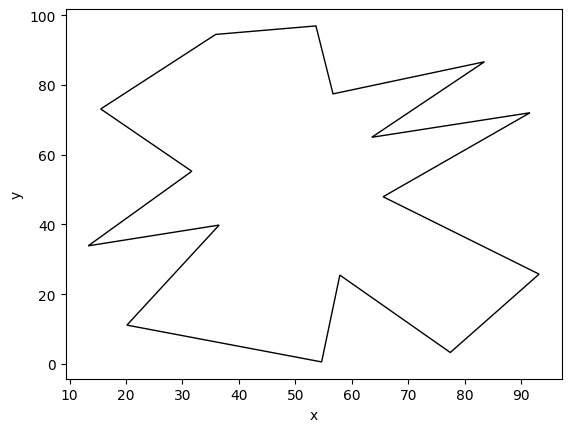

In [11]:
%matplotlib inline
draw_polygon(polygon)

In [12]:
test_polygons.append(polygon)

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [13]:
def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """
    # find min,max
    n=len(polygon)
    min_y,min_idx=polygon[0][1],0
    max_y,max_idx=polygon[0][1],0

    for i in range(1,n):
        if polygon[i][1]<min_y:
            min_y,min_idx=polygon[i][1],i
        if polygon[i][1]>max_y:
            max_y,max_idx=polygon[i][1],i
    
    # from min to max
    i=min_idx
    while i!=max_idx:
        if polygon[i][1]>polygon[(i+1)%n][1]:
            return False
        i=(i+1)%n
    
    # from max to min
    i=max_idx
    while i!=min_idx:
        if polygon[i][1]<polygon[(i+1)%n][1]:
            return False
        i=(i+1)%n

    return True

Przeprowadź test poprawności powyższej funkcji.

In [14]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.002s


Sprawdź monotoniczność swojego wielokątu.

In [15]:
print(is_y_monotonic(polygon))

False


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których wielokąt zaczyna się monotoniczny spadek 
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji. 
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny. 
- prawdiłowy, pozostałe przypadki, jeden sąsiad powyżej drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

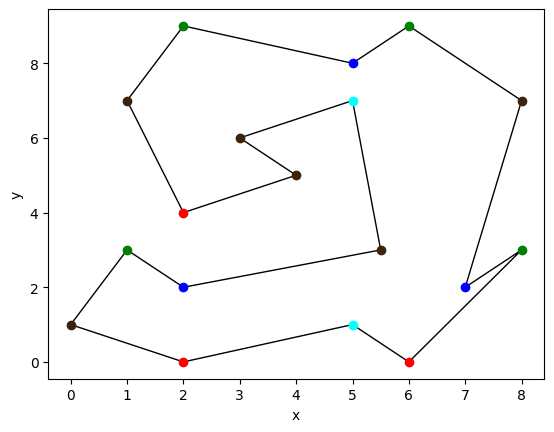

In [16]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [17]:
def color_vertex(polygon):
    """

    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    def det(a,b,c):
        return a[0]*b[1] + a[1]*c[0] + b[0]*c[1] - b[1]*c[0] - a[1]*b[0] - a[0]*c[1]

    def orientation(a,b,c):
        nonlocal epsilon
        d=det(a,b,c)
        if abs(d)<=epsilon:
            return 0
        elif d>0:
            return 1
        else:
            return -1
    
    epsilon=10**(-12)
    n=len(polygon)
    colors=[None for _ in range(n)]

    if n<3:
        raise Exception("Too few vetrices")
    
    for i in range(n):
        # both neighbours below i-th vertex
        if polygon[i-1][1]<polygon[i][1] and polygon[(i+1)%n][1]<polygon[i][1]:
            if orientation(polygon[i-1],polygon[i],polygon[(i+1)%n])==1:
                colors[i]=0
            else:
                colors[i]=3
        # both neighbours above i-th vertex
        elif polygon[i-1][1]>polygon[i][1] and polygon[(i+1)%n][1]>polygon[i][1]:
            if orientation(polygon[i-1],polygon[i],polygon[(i+1)%n])==1:
                colors[i]=1
            else:
                colors[i]=2
        else:
            colors[i]=4

    return colors

Przeprowadź test poprawności powyższej funkcji. 

In [18]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.003s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

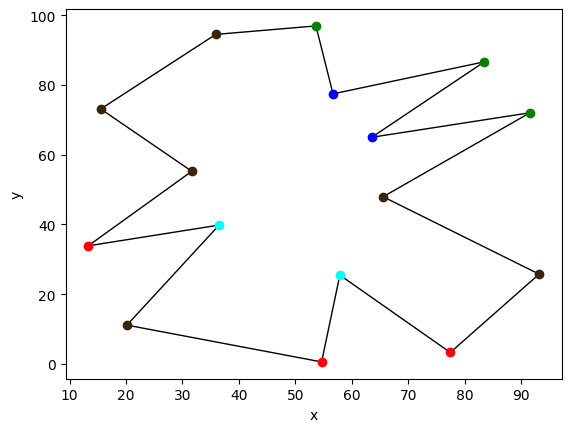

In [19]:
colors = color_vertex(polygon)
draw_polygon_colors(polygon,colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

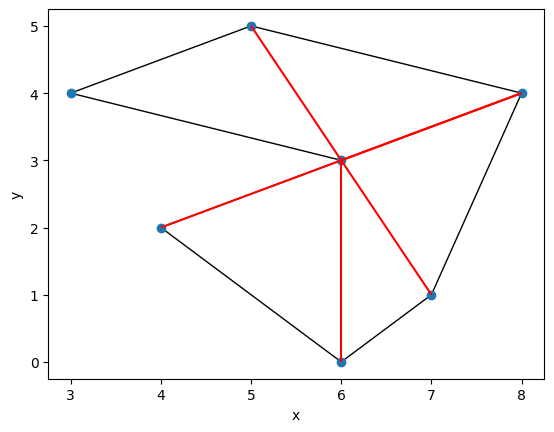

In [20]:
draw_polygon_tri(polygon_example_1,polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [21]:
def triangulation(polygon):
    """

    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """
    def det(a,b,c):
        return a[0]*b[1] + a[1]*c[0] + b[0]*c[1] - b[1]*c[0] - a[1]*b[0] - a[0]*c[1]

    def orientation(a,b,c):
        nonlocal epsilon
        d=det(a,b,c)
        if abs(d)<=epsilon:
            return 0
        elif d>0:
            return 1
        else:
            return -1
    
    def in_polygon(a,b,c):
        if (c in left and b in left):
            return orientation(a,b,c)==1
        else:
            return orientation(a,b,c)==-1

    # find min,max
    n=len(polygon)
    min_y,min_idx=polygon[0][1],0
    max_y,max_idx=polygon[0][1],0

    for i in range(1,n):
        if polygon[i][1]<min_y:
            min_y,min_idx=polygon[i][1],i
        if polygon[i][1]>max_y:
            max_y,max_idx=polygon[i][1],i
    
   # from min+1 to max
    right = set()
    i = (min_idx+1)%n
    while i != max_idx:
        right.add(polygon[i])
        i = (i + 1) % n

    # from max to min
    left = set()
    i = max_idx
    while i != min_idx:
        left.add(polygon[i])
        i = (i + 1) % n
    left.add(min_y)
    vertices=sorted(polygon,key=lambda x:x[1],reverse=True)

    # data preprocessing
    epsilon=10**(-12)

    segments=set()
    for i in range(n):
        segments.add((polygon[i-1],polygon[i]))

    stack=[vertices[0],vertices[1]]
    tri=[]
    # n=len(vertices)
    for i in range(2,n):
        if (vertices[i] in left and stack[-1] in left) or (vertices[i] in right and stack[-1] in right): # same side
            while len(stack)>1 and in_polygon(stack[-2],stack[-1],vertices[i]):
                if (stack[-2],vertices[i]) not in segments and (vertices[i],stack[-2]) not in segments:
                    tri.append((stack[-2],vertices[i]))
                stack.pop()
            stack.append(vertices[i])
        else:   # different side
            while len(stack)>0:
                u=stack.pop()
                if (u,vertices[i]) not in segments and (vertices[i],u) not in segments:
                    tri.append((u,vertices[i]))
            stack.append(vertices[i-1])
            stack.append(vertices[i])
            
    return tri


In [22]:
def triangulation_test(polygon):
    """

    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """
    def det(a,b,c):
        return a[0]*b[1] + a[1]*c[0] + b[0]*c[1] - b[1]*c[0] - a[1]*b[0] - a[0]*c[1]

    def orientation(a,b,c):
        nonlocal epsilon
        d=det(a,b,c)
        if abs(d)<=epsilon:
            return 0
        elif d>0:
            return 1
        else:
            return -1
    
    def in_polygon(a,b,c):
        if (c in left and b in left):
            return orientation(a,b,c)==1
        else:
            return orientation(a,b,c)==-1

    # find min,max
    n=len(polygon)
    min_y,min_idx=polygon[0][1],0
    max_y,max_idx=polygon[0][1],0

    for i in range(1,n):
        if polygon[i][1]<min_y:
            min_y,min_idx=polygon[i][1],i
        if polygon[i][1]>max_y:
            max_y,max_idx=polygon[i][1],i
    
   # from min+1 to max
    right = set()
    i = min_idx 
    while i != max_idx:
        right.add(polygon[i])
        i = (i + 1) % n

    # from max to min
    left = set()
    i = max_idx
    while i != min_idx:
        left.add(polygon[i])
        i = (i + 1) % n
    vertices=sorted(polygon,key=lambda x:x[1],reverse=True)

    # data preprocessing
    epsilon=10**(-12)

    segments=set()
    for i in range(n):
        segments.add((polygon[i-1],polygon[i]))
        
    indexes=dict()
    for i in range(n):
        indexes[polygon[i]]=i

    stack=[vertices[0],vertices[1]]
    tri=[]
    # n=len(vertices)
    for i in range(2,n):
        if (vertices[i] in left and stack[-1] in left) or (vertices[i] in right and stack[-1] in right): # same side
            while len(stack)>1 and in_polygon(stack[-2],stack[-1],vertices[i]):
                if (stack[-2],vertices[i]) not in segments and (vertices[i],stack[-2]) not in segments:
                    tri.append((indexes[stack[-2]],indexes[vertices[i]]))
                stack.pop()
            stack.append(vertices[i])
        else:   # different side
            while len(stack)>0:
                u=stack.pop()
                if (u,vertices[i]) not in segments and (vertices[i],u) not in segments:
                    tri.append((indexes[u],indexes[vertices[i]]))
            stack.append(vertices[i-1])
            stack.append(vertices[i])
            
    return tri


In [33]:
def triangulation_vis(polygon):
    """

    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """
    def det(a,b,c):
        return a[0]*b[1] + a[1]*c[0] + b[0]*c[1] - b[1]*c[0] - a[1]*b[0] - a[0]*c[1]

    def orientation(a,b,c):
        nonlocal epsilon
        d=det(a,b,c)
        if abs(d)<=epsilon:
            return 0
        elif d>0:
            return 1
        else:
            return -1
    
    def in_polygon(a,b,c):
        if (c in left and b in left):
            return orientation(a,b,c)==1
        else:
            return orientation(a,b,c)==-1

    # find min,max
    n=len(polygon)
    min_y,min_idx=polygon[0][1],0
    max_y,max_idx=polygon[0][1],0

    for i in range(1,n):
        if polygon[i][1]<min_y:
            min_y,min_idx=polygon[i][1],i
        if polygon[i][1]>max_y:
            max_y,max_idx=polygon[i][1],i
    
   # from min+1 to max
    right = set()
    i = min_idx
    while i != max_idx:
        right.add(polygon[i])
        i = (i + 1) % n

    # from max to min
    left = set()
    i = max_idx
    while i != min_idx:
        left.add(polygon[i])
        i = (i + 1) % n
    
    vertices=sorted(polygon,key=lambda x:x[1],reverse=True)

    # data preprocessing
    epsilon=10**(-12)

    segments=set()
    for i in range(n):
        segments.add((polygon[i-1],polygon[i]))

    vis=Visualizer()
    vis.add_point(polygon)
    vis.add_line_segment(list(segments))

    stack=[(vertices[0],vis.add_point(vertices[0],color='green')),(vertices[1],vis.add_point(vertices[1],color='green'))]
    tri=[]
    


    for i in range(2,n):
        p=vis.add_point(vertices[i],color='red')
        if (vertices[i] in left and stack[-1][0] in left) or (vertices[i] in right and stack[-1][0] in right): # same side
            while len(stack)>1 and in_polygon(stack[-2][0],stack[-1][0],vertices[i]):
                if (stack[-2][0],vertices[i]) not in segments and (vertices[i],stack[-2][0]) not in segments:
                    tri.append((stack[-2][0],vertices[i]))
                    vis.add_line_segment((stack[-2][0],vertices[i]),color='red')
                u,u_v=stack.pop()
                vis.remove_figure(u_v)
            stack.append((vertices[i],vis.add_point(vertices[i],color='green')))
        else:   # different side
            while len(stack)>0:
                u,u_v=stack.pop()
                vis.remove_figure(u_v)
                if (u,vertices[i]) not in segments and (vertices[i],u) not in segments:
                    tri.append((u,vertices[i]))
                    vis.add_line_segment((u,vertices[i]),color='red')
            stack.append((vertices[i-1],vis.add_point(vertices[i-1],color='green')))
            stack.append((vertices[i],vis.add_point(vertices[i],color='green')))
        vis.remove_figure(p)
    return tri,vis

    

In [24]:
triangulation(polygon)

[((35.88709677419355, 94.48051948051949),
  (83.46774193548387, 86.63419913419915)),
 ((53.62903225806451, 96.91558441558443),
  (83.46774193548387, 86.63419913419915)),
 ((35.88709677419355, 94.48051948051949),
  (56.653225806451616, 77.43506493506494)),
 ((56.653225806451616, 77.43506493506494),
  (15.524193548387096, 73.10606060606062)),
 ((15.524193548387096, 73.10606060606062),
  (91.53225806451613, 72.02380952380953)),
 ((56.653225806451616, 77.43506493506494),
  (91.53225806451613, 72.02380952380953)),
 ((15.524193548387096, 73.10606060606062),
  (63.508064516129025, 64.9891774891775)),
 ((63.508064516129025, 64.9891774891775),
  (31.653225806451612, 55.24891774891776)),
 ((31.653225806451612, 55.24891774891776),
  (65.52419354838709, 47.94372294372296)),
 ((63.508064516129025, 64.9891774891775),
  (65.52419354838709, 47.94372294372296)),
 ((65.52419354838709, 47.94372294372296),
  (36.49193548387096, 39.82683982683983)),
 ((31.653225806451612, 55.24891774891776),
  (36.49193548

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


In [25]:
Test().runtest(3, triangulation_test)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.005s


Zwizualizuj powstały wielokąt podzielony na trójkąty.

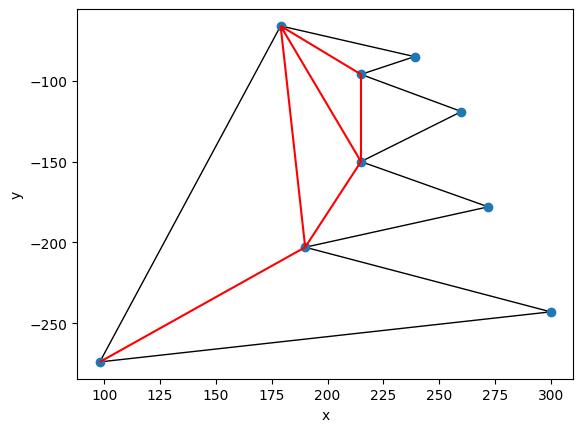

In [26]:
p=[(179, -66), (98, -274), (300, -243), (190, -203), (272, -178), (215, -150), (260, -119), (215, -96), (239, -85)]
tri = triangulation(p)
draw_polygon_tri(p,tri)

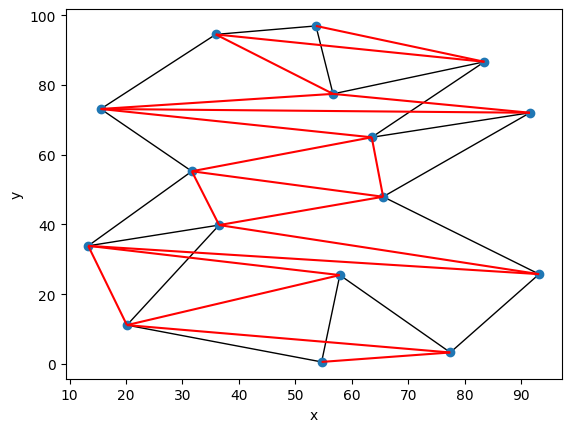

In [27]:
tri = triangulation(polygon)
draw_polygon_tri(polygon,tri)

Wizualizacja kroków algorytmu

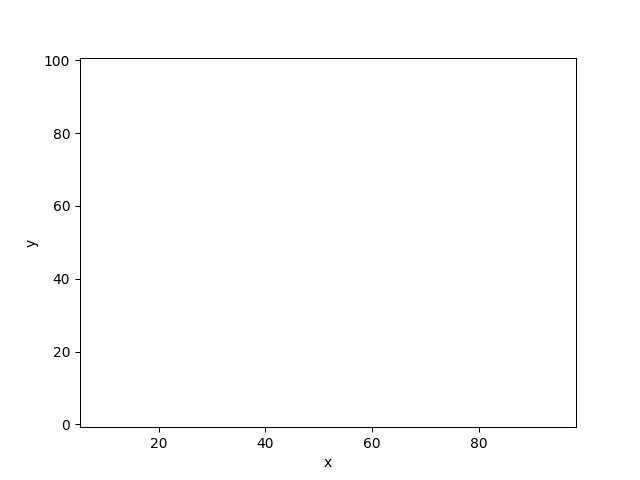

In [34]:
v_polygon=test_polygons[2]
polygoin_tri,polygon_vis=triangulation_vis(v_polygon)
polygon_vis.show_gif()

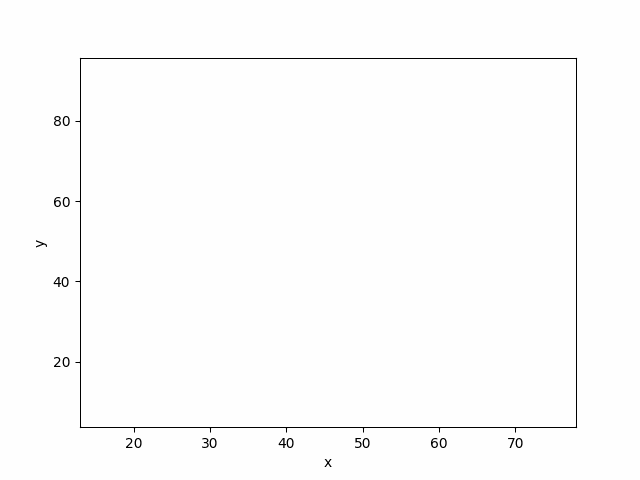

In [35]:
v_polygon=test_polygons[9]
polygoin_tri,polygon_vis=triangulation_vis(v_polygon)
polygon_vis.show_gif()

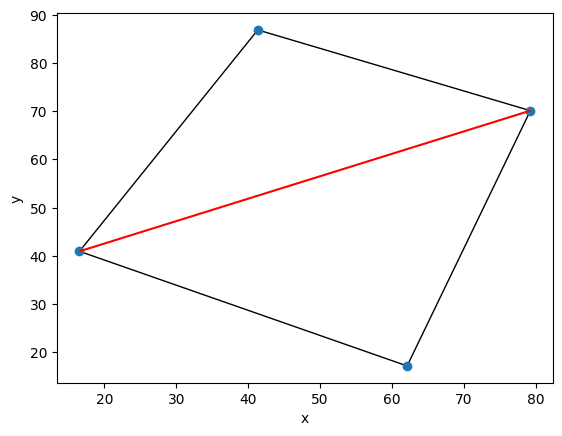

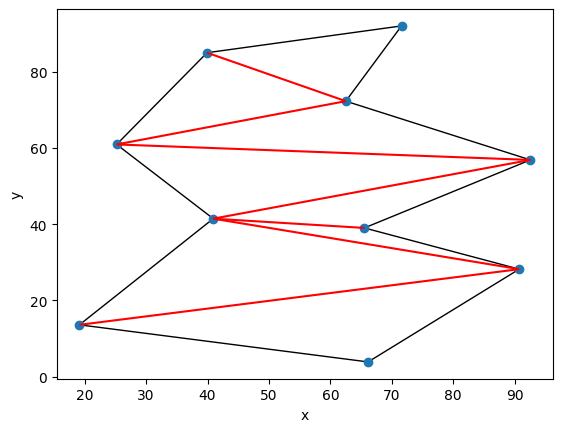

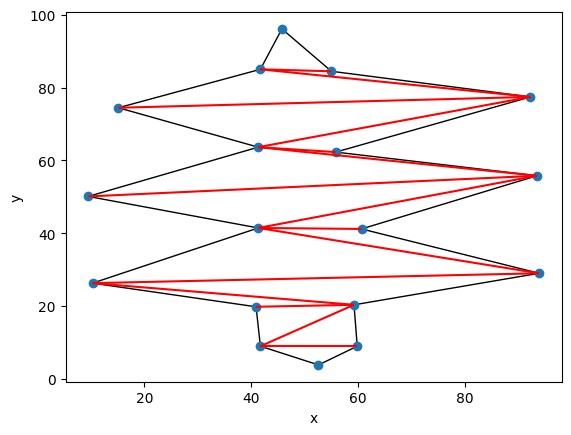

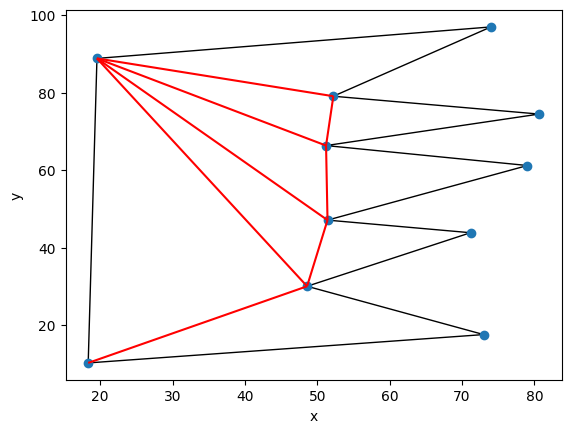

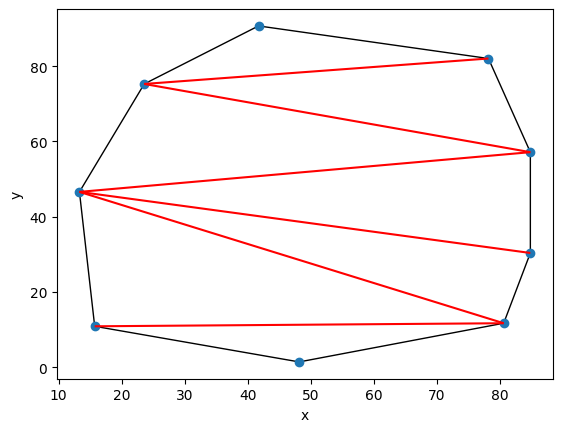

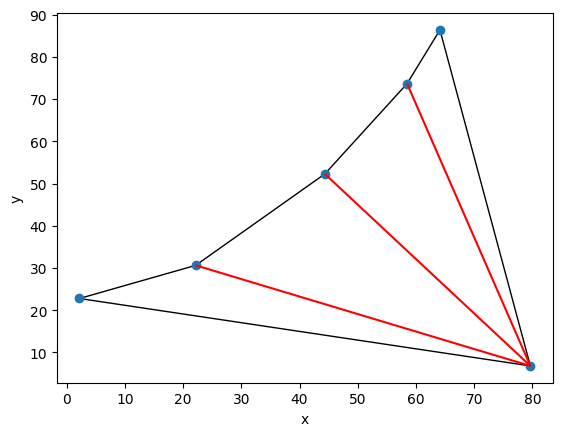

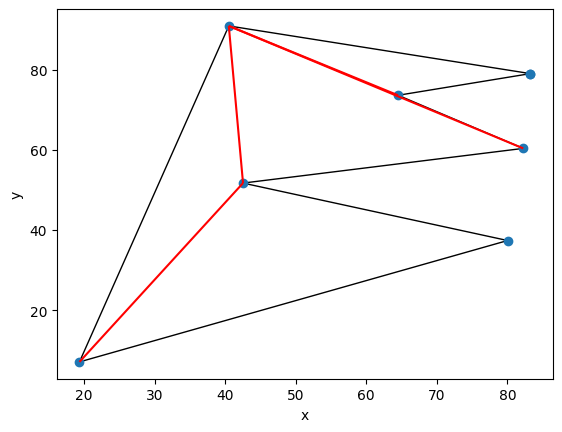

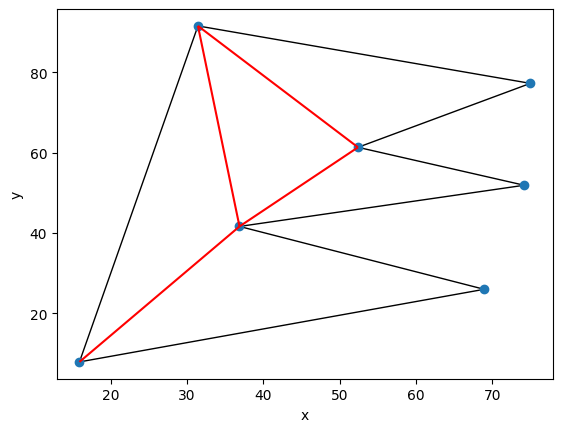

In [29]:
%matplotlib inline
# print triangulations of test_polygons
for polygon in test_polygons:
    if is_y_monotonic(polygon):
        draw_polygon_tri(polygon,triangulation(polygon))

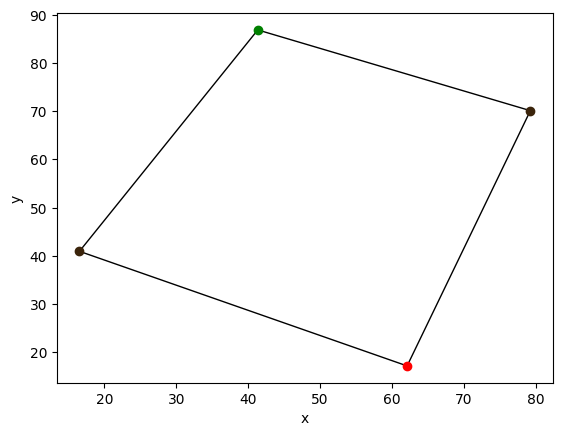

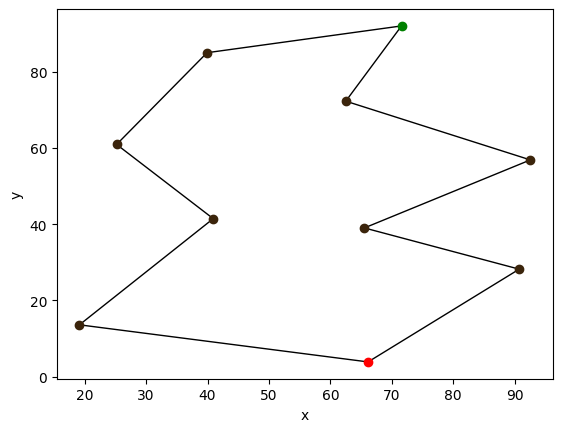

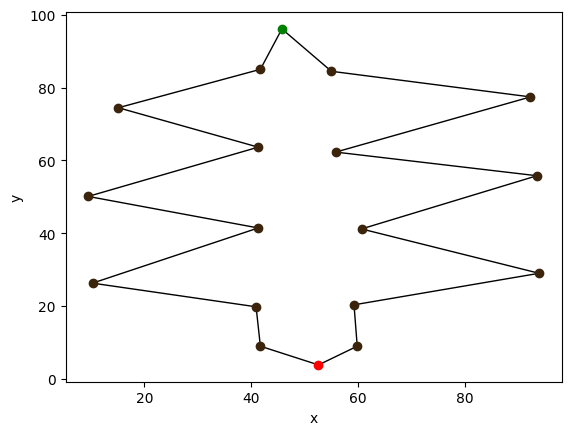

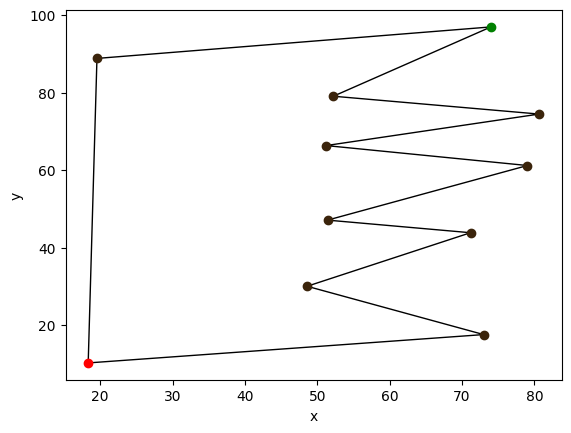

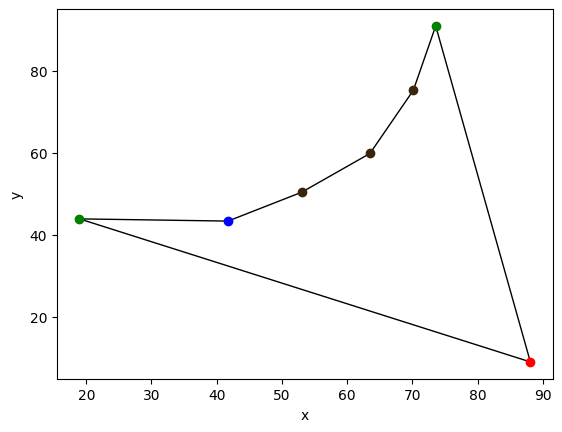

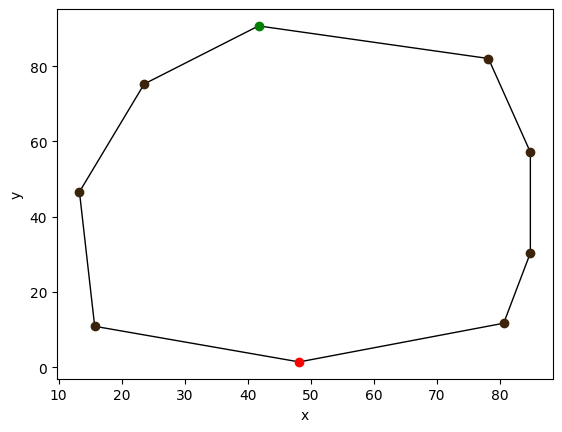

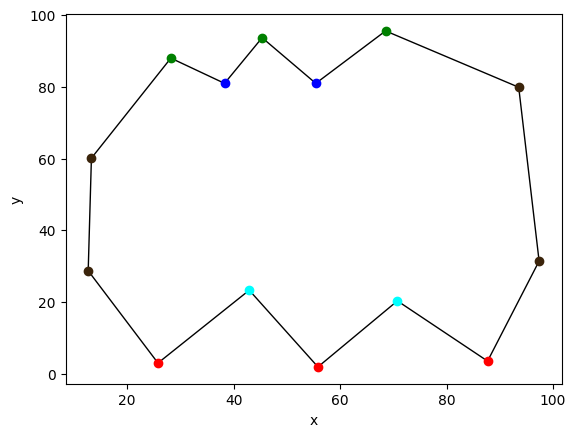

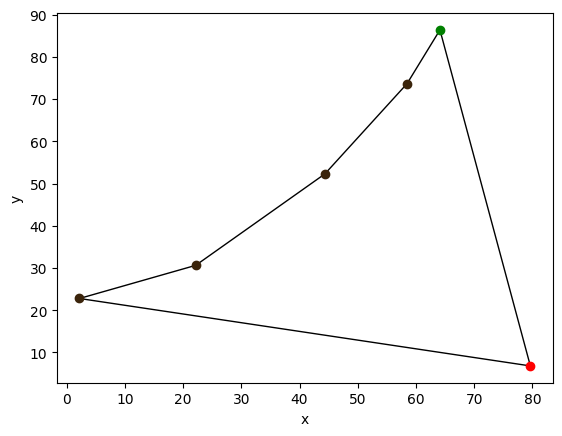

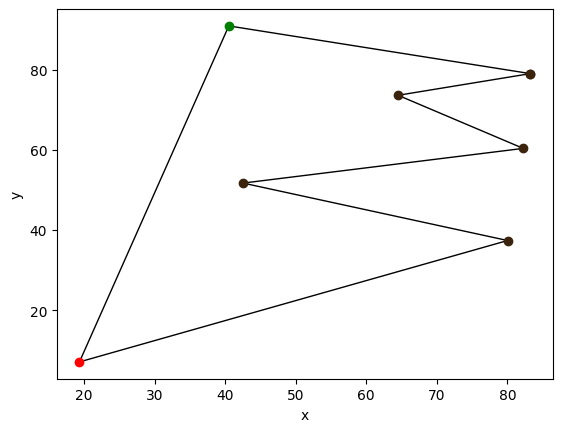

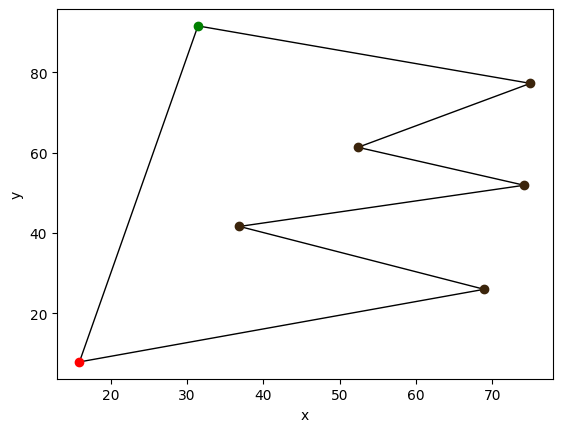

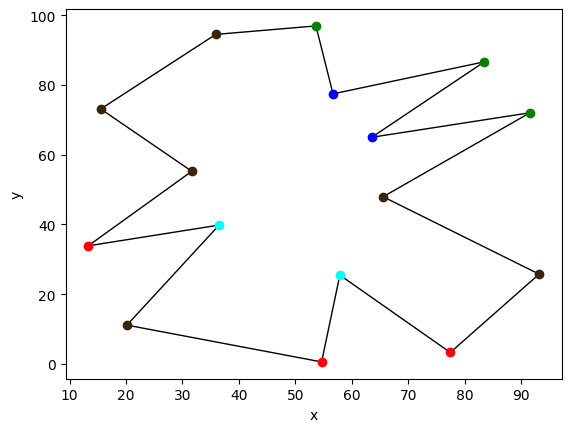

In [30]:
%matplotlib inline
# print vertices coloring for test polygons
for polygon in test_polygons:
    draw_polygon_colors(polygon,color_vertex(polygon))

In [31]:
dill.dump_session('notebook_env.db')